Séries Temporais - médias móveis

In [81]:
# Exemplo de decomposição de série temporal com Python. 
# importando o Pandas, o IO para leitura do arquivo e a biblioteca datetime

import pandas as pd
import numpy as np
import io
from datetime import datetime

# bibliotecas para gerar os gráficos
import matplotlib.pyplot as plt
import seaborn as sns

# importando também o modelo estatístico para trabalhar com a decomposição da série temporal
from statsmodels.tsa.seasonal import seasonal_decompose

Vamos utilizar os dados referentes ao valor do combustível no segundo semestre de 2020 para analisar a média móvel

Fonte: https://www.gov.br/anp/pt-br/centrais-de-conteudo/dados-abertos/serie-historica-de-precos-de-combustiveis

In [65]:
# carregando dados para o Google Colab
from google.colab import files
uploaded = files.upload()

Saving ST-aula3-gasolina.csv to ST-aula3-gasolina (1).csv


In [66]:
# carregando o arquivo para o dataframe bitcoin
gasolina = pd.read_csv(io.BytesIO(uploaded['ST-aula3-gasolina.csv']))

In [67]:
# visualizar os dados carregados
gasolina.head()

,Data,Valor
0,01/07/2020,3.980609
1,02/07/2020,3.965667
2,06/07/2020,4.264714
3,07/07/2020,3.890818
4,08/07/2020,3.945381


In [68]:
# convertendo o campo date para ser do tipo datetime
gasolina['Data'] = pd.to_datetime(gasolina['Data'])

# verificando a conversão, deve aparecer: pandas._libs.tslibs.timestamps.Timestamp
type(gasolina.loc[0]['Data'])

pandas._libs.tslibs.timestamps.Timestamp

In [69]:
gasolina.head()

,Data,Valor
0,2020-01-07,3.980609
1,2020-02-07,3.965667
2,2020-06-07,4.264714
3,2020-07-07,3.890818
4,2020-08-07,3.945381


In [70]:
# identificar o tamanho da base de dados
gasolina.shape

(51, 2)

In [71]:
# ajustando o índice do DataFrame para que seja considerado a coluna Date
# para isto devemos utilizar o método set_index()

gasolina.set_index('Data', inplace=True)

In [72]:
gasolina

,Valor
Data,
2020-01-07,3.980609
2020-02-07,3.965667
2020-06-07,4.264714
2020-07-07,3.890818
2020-08-07,3.945381
2020-07-14,3.967958
2020-07-15,4.040211
2020-07-20,4.276000
2020-07-21,4.048920


In [73]:
# ordenando a série temporal
gasolina = gasolina.sort_values('Data')

In [74]:
# verificando a mudança
gasolina

,Valor
Data,
2020-01-07,3.980609
2020-01-12,4.375211
2020-02-07,3.965667
2020-02-12,4.263409
2020-03-08,4.124000
2020-03-11,4.218320
2020-04-08,4.013857
2020-04-11,4.330000
2020-05-08,4.123167


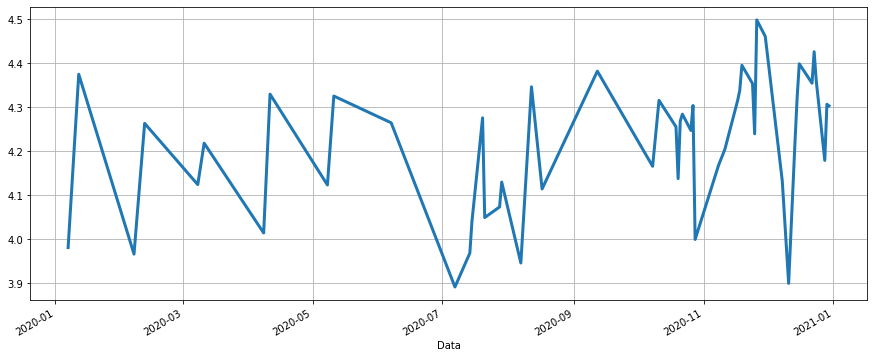

In [75]:
# o estudo das séries temporais utiliza muitos gráficos
# como exemplo vamos utilizar um gráfico de linha projetando as variações do valor de abertura diário (Close)

gasolina['Valor'].plot(figsize=(15,6), grid=True, linewidth=3)

In [76]:
# para calcular a média móvel utilizamos o comando rolling e mean
# o método rolling do dataframe retorna uma janela de período n (5 no nosso exemplo) 
# o método mean() é utilizado para computar a média da janela.

gasolina['MM5'] = gasolina["Valor"].rolling(5).mean()
gasolina.head()

,Valor,MM5
Data,,
2020-01-07,3.980609,NaN
2020-01-12,4.375211,NaN
2020-02-07,3.965667,NaN
2020-02-12,4.263409,NaN
2020-03-08,4.124000,4.141779


In [77]:
# para calcular a média exponencial utiliza-se o método ewm (Exponential Weighted Functions)
# neste método passamos o tamanho da janela (span) e a quantidade mínima de dados até iniciarmos o cálculo (min_periods)
# manteremos a janela de 5 e a quantidade mínima de 5

gasolina["MME5"] = gasolina["Valor"].ewm(span=5, min_periods=5).mean()

In [78]:
# verificando as médias:

gasolina

,Valor,MM5,MME5
Data,,,
2020-01-07,3.980609,NaN,NaN
2020-01-12,4.375211,NaN,NaN
2020-02-07,3.965667,NaN,NaN
2020-02-12,4.263409,NaN,NaN
2020-03-08,4.124000,4.141779,4.150364
2020-03-11,4.218320,4.189321,4.175196
2020-04-08,4.013857,4.117051,4.118073
2020-04-11,4.330000,4.189917,4.191584
2020-05-08,4.123167,4.161869,4.168169


Text(0.5, 1.0, 'Médias móveis')

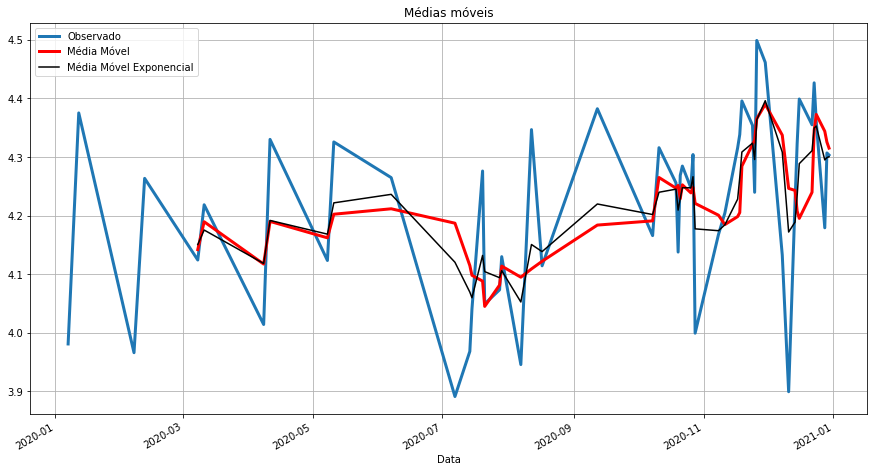

In [79]:
fig = plt.subplots(figsize=(15,8))
orig = gasolina['Valor'].plot(figsize=(15,8), grid=True, linewidth=3, label='Observado')
media = gasolina['MM5'].plot(figsize=(15,8), grid=True, linewidth=3, color='red', label='Média Móvel')
exponencial = plt.plot(gasolina['MME5'], color='black', label='Média Móvel Exponencial')

plt.legend(loc='best')
plt.title('Médias móveis')

In [85]:
# Aplicando Média Móvel Ponderada (MMP)

# o pandas não possui um método pronto para uso para calcular a MMP. Para isto devemos utilizar o método .apply()
# através deste método iremos criar uma função personalizada para uma janela móvel
# para exemplificar vamos calcular a MMP considerando os últimos 5 registros
# inicialmente criamos uma matriz de pesos - números inteiros de 1 a 5:

peso = np.arange(1,6) 

# visualizando o resultado
peso

array([1, 2, 3, 4, 5])

In [88]:
# usando a função do Numpy .dot() que calcula o produto do ponto de duas arrays de entrada
# adicionado a coluna com a média móvel ponderada

gasolina["MMP"] = gasolina["Valor"].rolling(5).apply(lambda Valor: np.dot(Valor, peso)/peso.sum(), raw=True)

# visualizando o resultado
gasolina.head(20)

,Valor,MM5,MME5,MMP
Data,,,,
2020-01-07,3.980609,NaN,NaN,NaN
2020-01-12,4.375211,NaN,NaN,NaN
2020-02-07,3.965667,NaN,NaN,NaN
2020-02-12,4.263409,NaN,NaN,NaN
2020-03-08,4.124000,4.141779,4.150364,4.153444
2020-03-11,4.218320,4.189321,4.175196,4.178958
2020-04-08,4.013857,4.117051,4.118073,4.120470
2020-04-11,4.330000,4.189917,4.191584,4.191453
2020-05-08,4.123167,4.161869,4.168169,4.169203


Text(0.5, 1.0, 'Médias móveis')

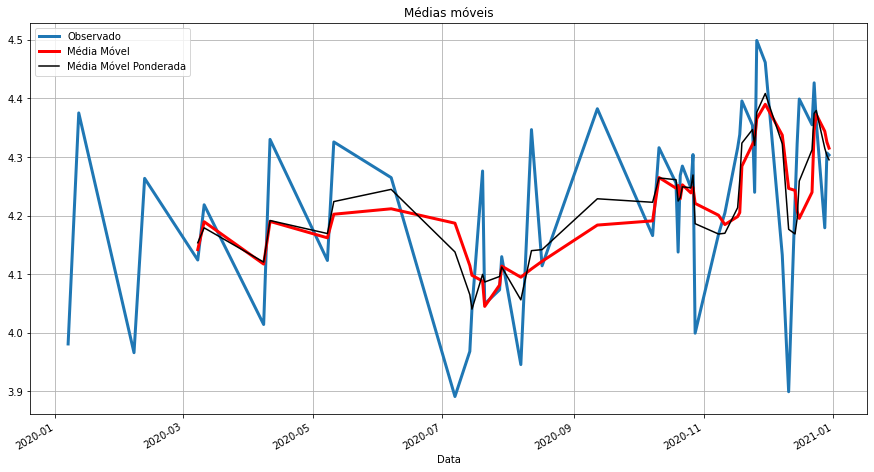

In [89]:
# finalizamos vendo o comportamento das médias móveis ponderadas em comparação com as médias simples

fig = plt.subplots(figsize=(15,8))
orig = gasolina['Valor'].plot(figsize=(15,8), grid=True, linewidth=3, label='Observado')
media = gasolina['MM5'].plot(figsize=(15,8), grid=True, linewidth=3, color='red', label='Média Móvel')
ponderada = plt.plot(gasolina['MMP'], color='black', label='Média Móvel Ponderada')

plt.legend(loc='best')
plt.title('Médias móveis')